<a href="https://colab.research.google.com/github/neeklesh/Data-Science-Projects/blob/main/Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_curve, classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# Load the dataset
file_path = '/HeartDisease.csv'
data = pd.read_csv(file_path)

       HeartDiseaseorAttack         HighBP       HighChol            BMI  \
count         253680.000000  253680.000000  253680.000000  253680.000000   
mean               0.094186       0.429001       0.424121      28.382364   
std                0.292087       0.494934       0.494210       6.608694   
min                0.000000       0.000000       0.000000      12.000000   
25%                0.000000       0.000000       0.000000      24.000000   
50%                0.000000       0.000000       0.000000      27.000000   
75%                0.000000       1.000000       1.000000      31.000000   
max                1.000000       1.000000       1.000000      98.000000   

              Smoker       Diabetes   PhysActivity         Fruits  \
count  253680.000000  253680.000000  253680.000000  253680.000000   
mean        0.443169       0.296921       0.756544       0.634256   
std         0.496761       0.698160       0.429169       0.481639   
min         0.000000       0.000000    

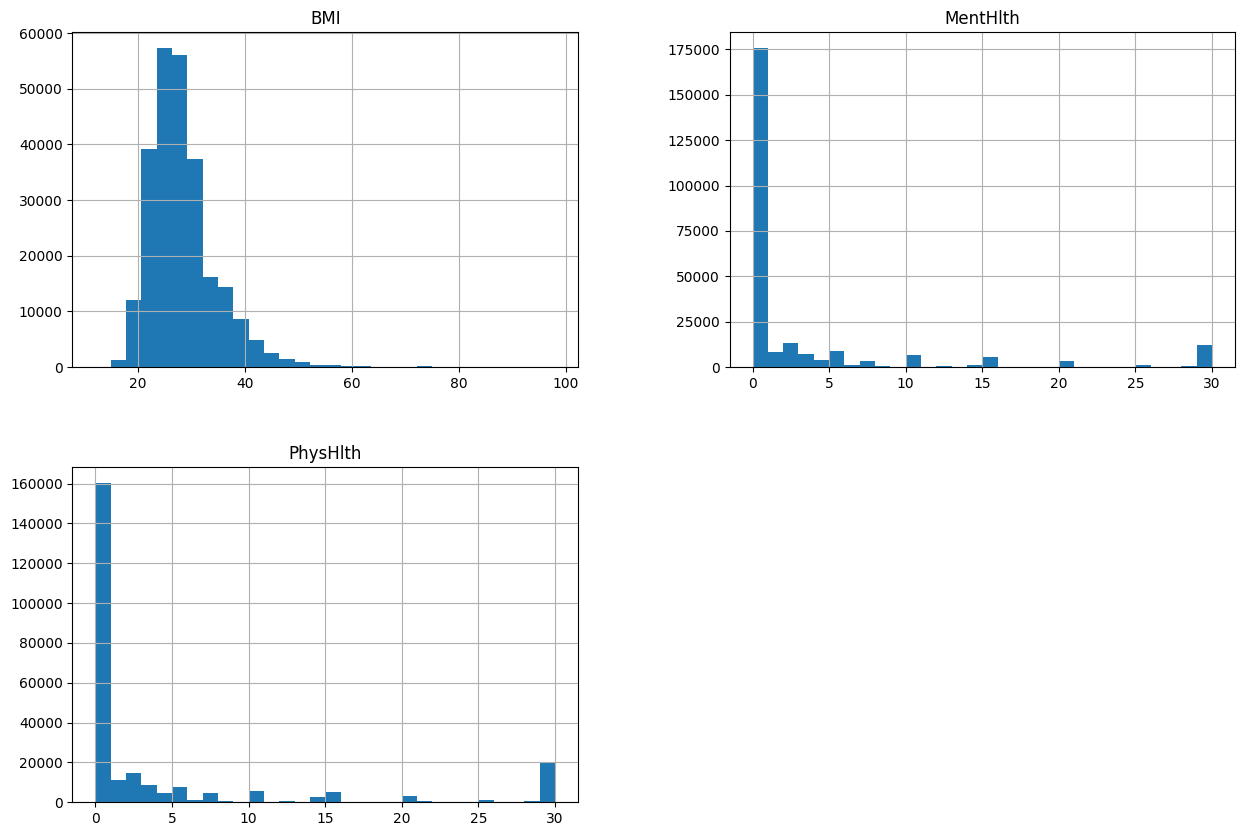

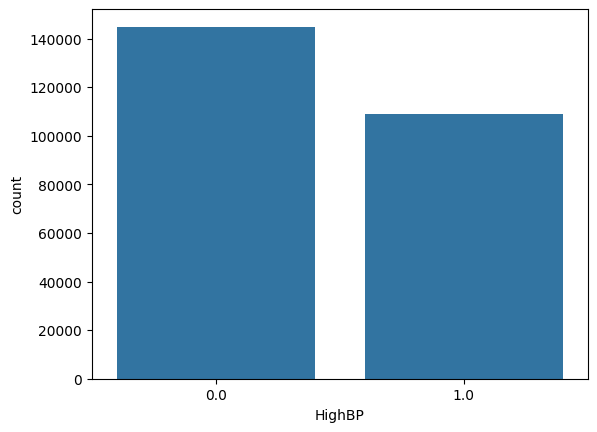

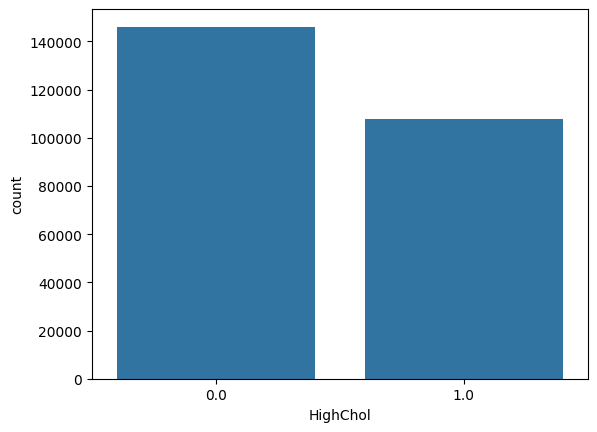

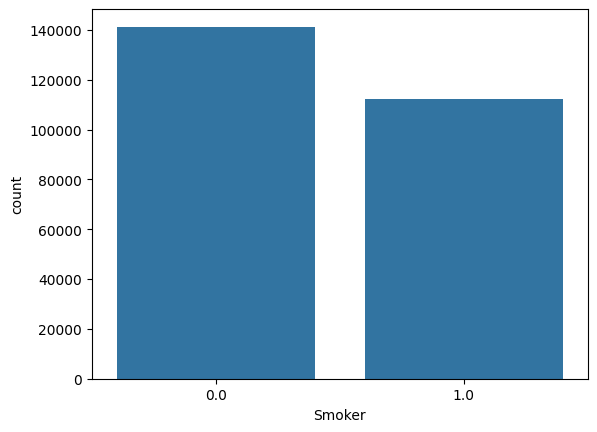

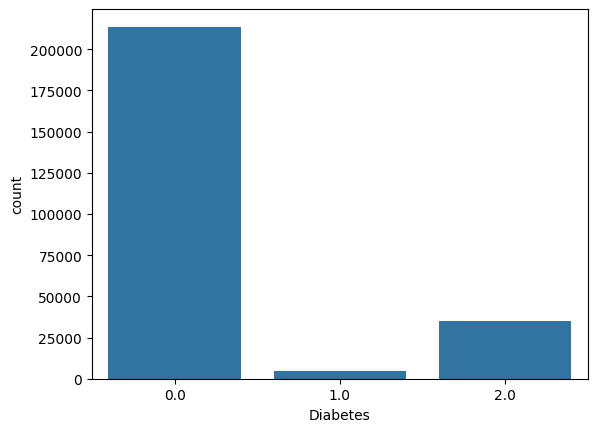

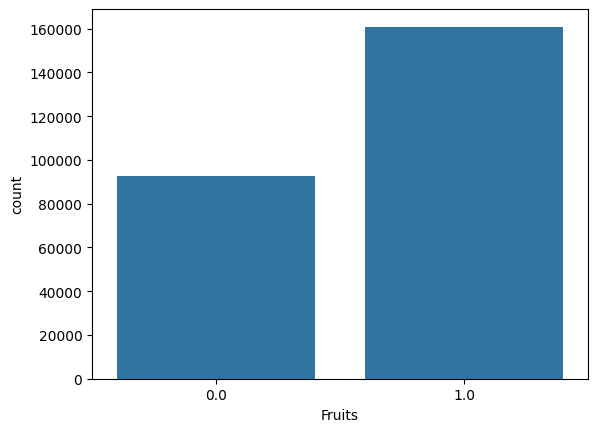

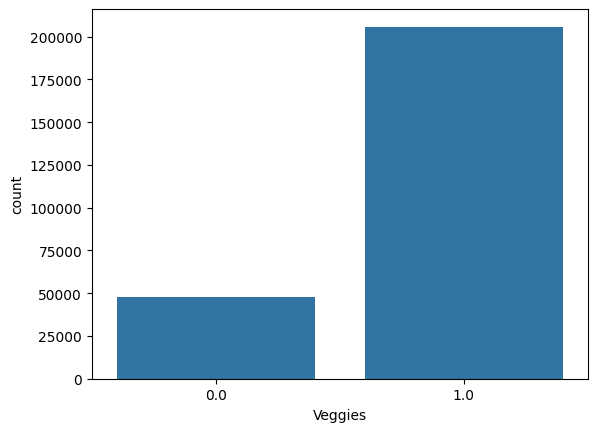

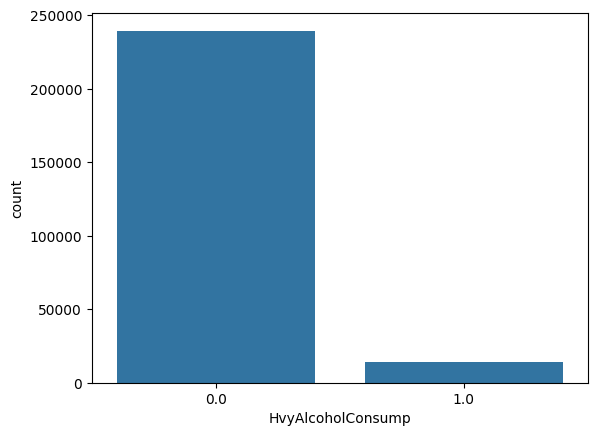

In [10]:
# Display summary statistics
print(data.describe())

# Plot the distributions of numerical features
numeric_features = ['BMI', 'MentHlth', 'PhysHlth']
data[numeric_features].hist(bins=30, figsize=(15, 10))
plt.show()

# Plot the count plots for binary and categorical features
binary_features = ['HighBP', 'HighChol', 'Smoker', 'Diabetes', 'Fruits', 'Veggies', 'HvyAlcoholConsump']
for feature in binary_features:
    sns.countplot(x=feature, data=data)
    plt.show()

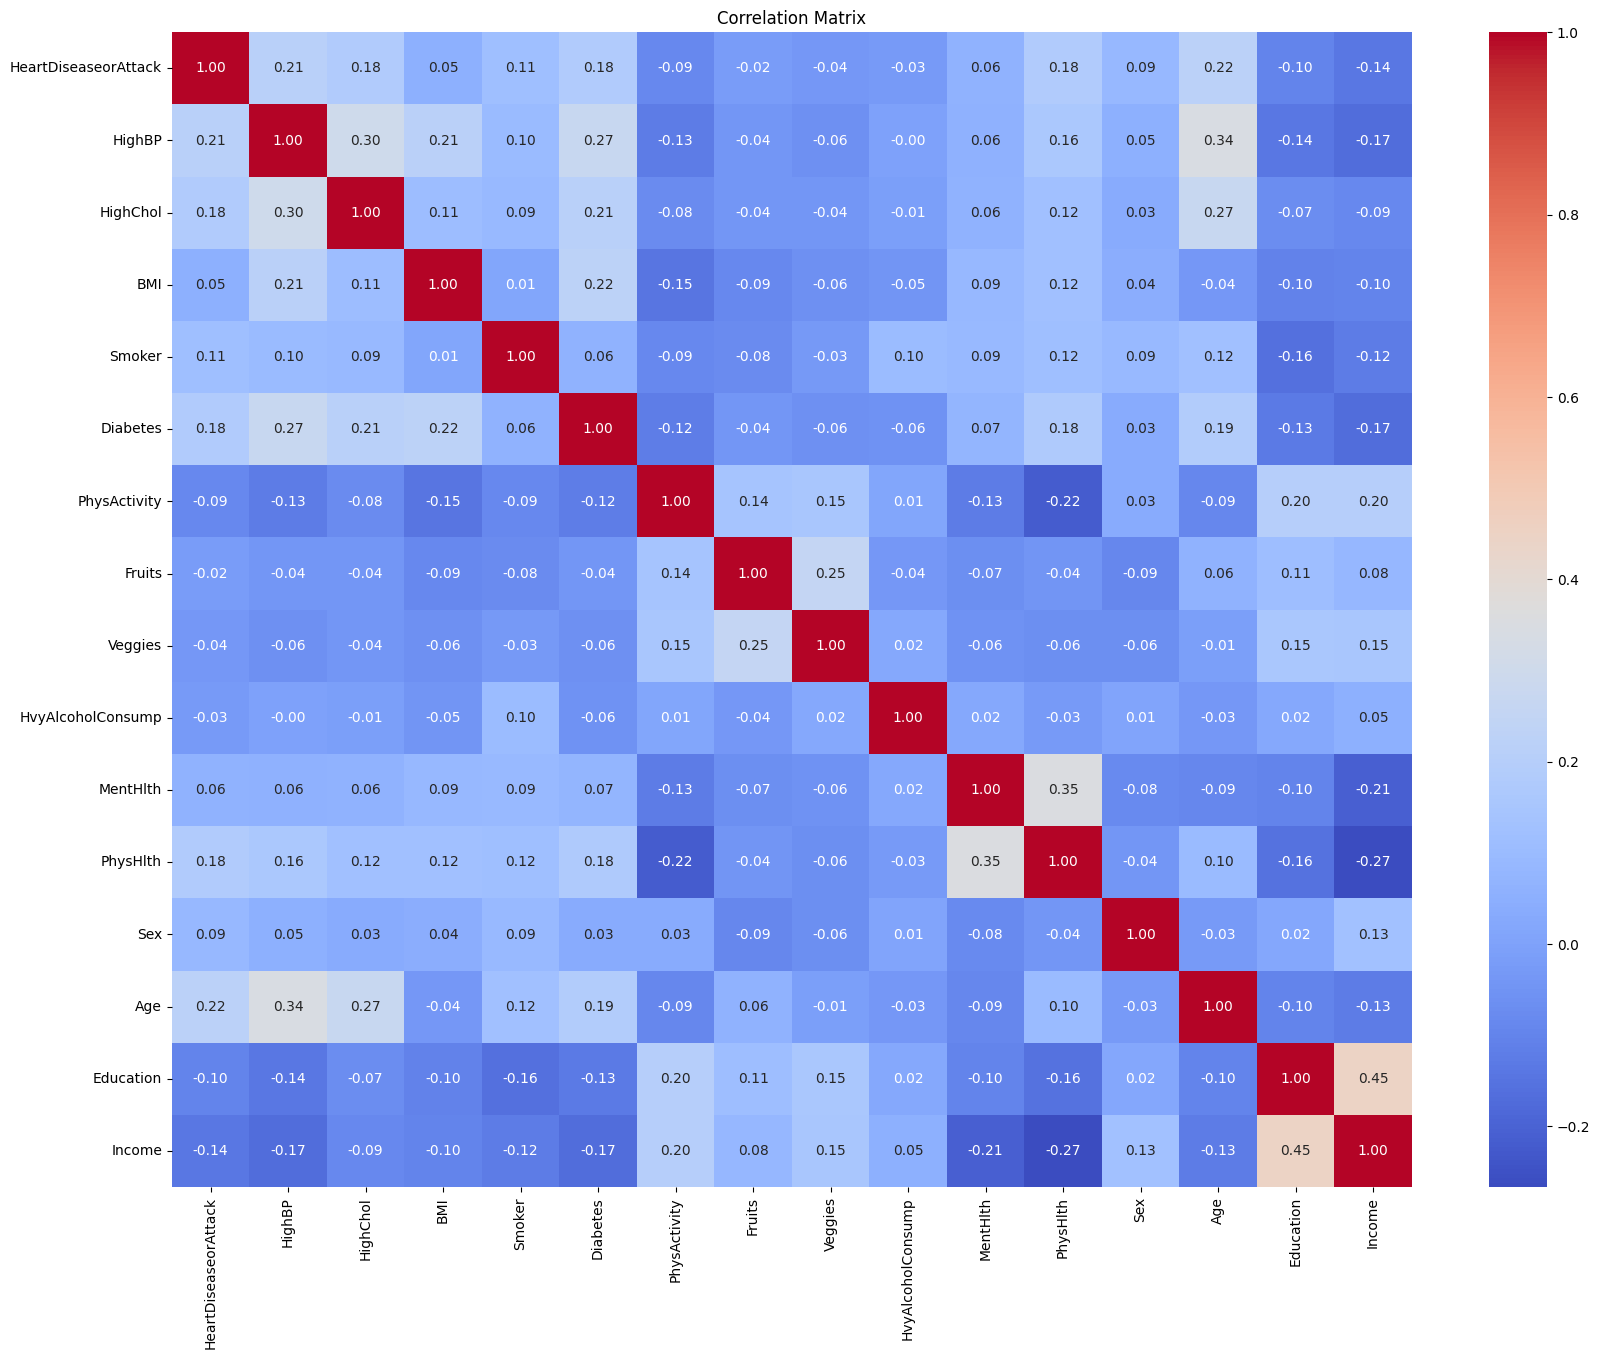

In [11]:
# Correlation matrix
corr_matrix = data.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

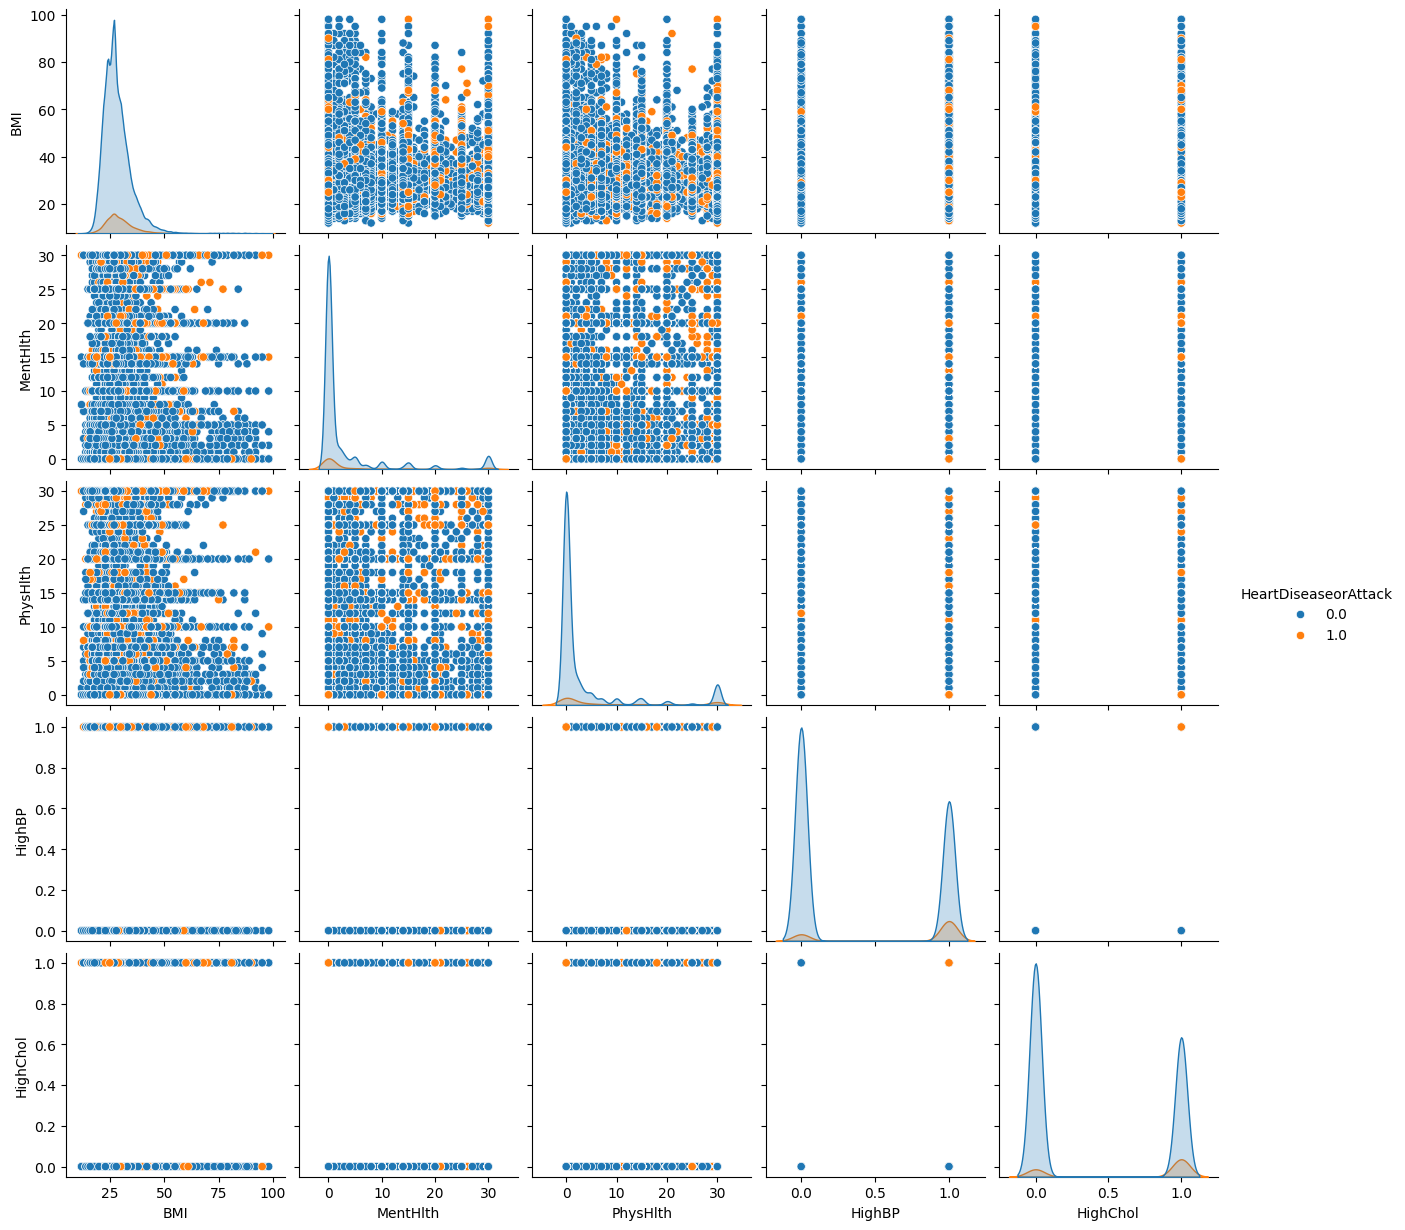

In [ ]:
# Select key features for pairplot
key_features = ['HeartDiseaseorAttack', 'BMI', 'MentHlth', 'PhysHlth', 'HighBP', 'HighChol']
sns.pairplot(data[key_features], hue='HeartDiseaseorAttack')
plt.show()

In [ ]:
#Feature Engineering

In [12]:
# Create new features if necessary
# Example: Interaction between BMI and HighBP
data['BMI_HighBP'] = data['BMI'] * data['HighBP']

In [ ]:
#Step 3: Layout Binary Classification Experimentation Space

In [14]:
# List of models to experiment with
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, solver='lbfgs'),
    'Random Forest': RandomForestClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Naive Bayes': GaussianNB()
}

In [15]:
 # Assuming 'data' is your DataFrame and 'numeric_features' is a list of numerical feature names
# Split the data into training and testing sets
X = data.drop('HeartDiseaseorAttack', axis=1)
y = data['HeartDiseaseorAttack']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test[numeric_features] = scaler.transform(X_test[numeric_features])

Logistic Regression Best Threshold=0.16224072270076623, F-Score=0.386
Random Forest Best Threshold=0.2025, F-Score=0.343
K-Nearest Neighbors Best Threshold=0.2, F-Score=0.296
Gradient Boosting Best Threshold=0.19166067783237334, F-Score=0.388
Naive Bayes Best Threshold=0.9999997505943297, F-Score=nan


<ipython-input-16-d847ab10c40b>:9: RuntimeWarning: invalid value encountered in divide
  fscore = (2 * precision * recall) / (precision + recall)


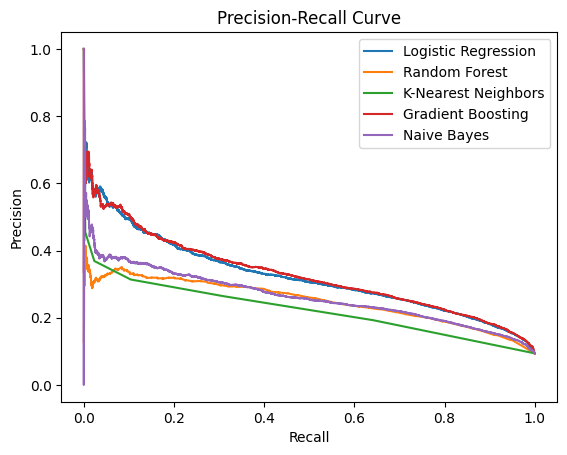

In [16]:
# Train models and plot precision-recall curves
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
    plt.plot(recall, precision, label=name)

    # Determine best threshold
    fscore = (2 * precision * recall) / (precision + recall)
    ix = np.argmax(fscore[:-1])  # Skip the last element for thresholds
    best_threshold = thresholds[ix]
    print(f'{name} Best Threshold={best_threshold}, F-Score={fscore[ix]:.3f}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.title('Precision-Recall Curve')
plt.show()

In [17]:
#Step 5: Publish Performance of All Models

In [18]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'Performance of {name}:')
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print(f'ROC AUC Score: {roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]):.3f}\n')

Performance of Logistic Regression:
              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95     45968
         1.0       0.53      0.07      0.12      4768

    accuracy                           0.91     50736
   macro avg       0.72      0.53      0.54     50736
weighted avg       0.88      0.91      0.87     50736

[[45673   295]
 [ 4433   335]]
ROC AUC Score: 0.827

Performance of Random Forest:
              precision    recall  f1-score   support

         0.0       0.91      0.98      0.95     45968
         1.0       0.34      0.08      0.14      4768

    accuracy                           0.90     50736
   macro avg       0.63      0.53      0.54     50736
weighted avg       0.86      0.90      0.87     50736

[[45200   768]
 [ 4365   403]]
ROC AUC Score: 0.785

Performance of K-Nearest Neighbors:
              precision    recall  f1-score   support

         0.0       0.91      0.98      0.94     45968
         1.0       0.31      

In [19]:
#Step 6: List Out the Most Important Drivers of Heart Disease or Attack

Feature Importances:
BMI                  0.163878
Age                  0.117301
BMI_HighBP           0.115904
Income               0.114186
PhysHlth             0.102681
Education            0.082826
MentHlth             0.075138
Fruits               0.038799
PhysActivity         0.032138
Veggies              0.031633
Diabetes             0.029347
HighChol             0.023980
Smoker               0.023080
Sex                  0.021931
HighBP               0.016690
HvyAlcoholConsump    0.010490
dtype: float64


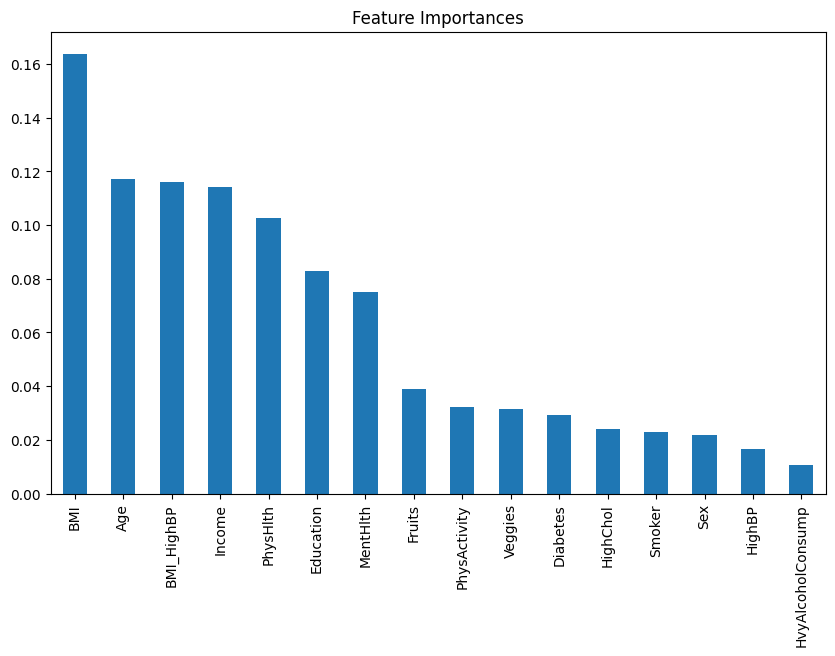

In [20]:
# Feature importance for Random Forest
rf_model = models['Random Forest']
rf_model.fit(X_train, y_train)
feature_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

print("Feature Importances:")
print(feature_importances)

# Plot feature importances
feature_importances.plot(kind='bar', figsize=(10, 6))
plt.title('Feature Importances')
plt.show()

In [21]:
#Step 7: Handle Class Imbalance Using Oversampling and Undersampling

In [22]:
# Oversample the minority class using SMOTE
oversample = SMOTE()
X_smote, y_smote = oversample.fit_resample(X_train, y_train)

# Train and evaluate model
for name, model in models.items():
    model.fit(X_smote, y_smote)
    y_pred = model.predict(X_test)
    print(f'Performance of {name} after SMOTE:')
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print(f'ROC AUC Score: {roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]):.3f}\n')

Performance of Logistic Regression after SMOTE:
              precision    recall  f1-score   support

         0.0       0.97      0.73      0.83     45968
         1.0       0.23      0.78      0.35      4768

    accuracy                           0.73     50736
   macro avg       0.60      0.75      0.59     50736
weighted avg       0.90      0.73      0.78     50736

[[33337 12631]
 [ 1062  3706]]
ROC AUC Score: 0.826

Performance of Random Forest after SMOTE:
              precision    recall  f1-score   support

         0.0       0.92      0.97      0.94     45968
         1.0       0.31      0.13      0.19      4768

    accuracy                           0.89     50736
   macro avg       0.61      0.55      0.56     50736
weighted avg       0.86      0.89      0.87     50736

[[44554  1414]
 [ 4131   637]]
ROC AUC Score: 0.779

Performance of K-Nearest Neighbors after SMOTE:
              precision    recall  f1-score   support

         0.0       0.94      0.77      0.85    

In [23]:
# Undersample the majority class using RandomUnderSampler
undersample = RandomUnderSampler()
X_under, y_under = undersample.fit_resample(X_train, y_train)

# Train and evaluate model
for name, model in models.items():
    model.fit(X_under, y_under)
    y_pred = model.predict(X_test)
    print(f'Performance of {name} after Undersampling:')
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print(f'ROC AUC Score: {roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]):.3f}\n')

Performance of Logistic Regression after Undersampling:
              precision    recall  f1-score   support

         0.0       0.97      0.72      0.83     45968
         1.0       0.23      0.79      0.35      4768

    accuracy                           0.73     50736
   macro avg       0.60      0.75      0.59     50736
weighted avg       0.90      0.73      0.78     50736

[[33131 12837]
 [ 1005  3763]]
ROC AUC Score: 0.827

Performance of Random Forest after Undersampling:
              precision    recall  f1-score   support

         0.0       0.97      0.69      0.81     45968
         1.0       0.21      0.77      0.33      4768

    accuracy                           0.70     50736
   macro avg       0.59      0.73      0.57     50736
weighted avg       0.90      0.70      0.76     50736

[[31904 14064]
 [ 1079  3689]]
ROC AUC Score: 0.801

Performance of K-Nearest Neighbors after Undersampling:
              precision    recall  f1-score   support

         0.0       0.96

In [27]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    model_performance[name] = roc_auc
    print(f'{name} ROC AUC Score: {roc_auc:.3f}')

Logistic Regression ROC AUC Score: 0.827
Random Forest ROC AUC Score: 0.785
K-Nearest Neighbors ROC AUC Score: 0.697
Gradient Boosting ROC AUC Score: 0.830
Naive Bayes ROC AUC Score: 0.791


In [28]:
# Identify the best model
best_model_name = max(model_performance, key=model_performance.get)
best_model_score = model_performance[best_model_name]

print(f'\nBest Model: {best_model_name} with ROC AUC Score: {best_model_score:.3f}')



Best Model: Gradient Boosting with ROC AUC Score: 0.830


In [30]:
# Train the best model on the entire training data
best_model = models[best_model_name]
best_model.fit(X_train, y_train)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.71      0.82     45968
         1.0       0.21      0.74      0.33      4768

    accuracy                           0.71     50736
   macro avg       0.59      0.72      0.57     50736
weighted avg       0.89      0.71      0.77     50736

[[32635 13333]
 [ 1253  3515]]


In [31]:
# Save the best model for future use
import joblib
joblib.dump(best_model, 'best_model.pkl')

print(f'\nBest model ({best_model_name}) saved as best_model.pkl')


Best model (Gradient Boosting) saved as best_model.pkl


In [32]:
#Loading a Saved Model

In [33]:
# Load the saved model
loaded_model = joblib.load('best_model.pkl')

# Use the loaded model to make predictions
predictions = loaded_model.predict(X_test)

# Evaluate the loaded model
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95     45968
         1.0       0.53      0.04      0.08      4768

    accuracy                           0.91     50736
   macro avg       0.72      0.52      0.52     50736
weighted avg       0.87      0.91      0.87     50736

[[45776   192]
 [ 4555   213]]
